In [1]:
import pandas as pd
import numpy as np

def getTagsDict(df):
    tag_dict = {}
    
    for index, row in df.iterrows():
        for tag in row['hashtags']:
            if tag in tag_dict:
                tag_dict[tag] = tag_dict[tag] + 1
            else:
                tag_dict[tag] = 1
                
    sort_dict = sorted(tag_dict.items(), key=lambda kv: kv[1])
    return sort_dict

filename = '../HashtagNetwork/allseason_20k_rawdata.json'
allseason = pd.read_json(filename)
base_df = allseason[['id','username','hashtags']]

base_df.index = base_df['id']
base_df = base_df.drop(columns=['username'])
base_df = base_df.drop(columns=['id'])

fashion_df = base_df[base_df.astype(str)['hashtags'] != '[]']

tag_df = list(fashion_df['hashtags'])
for i in range(len(tag_df)):
    tag_df[i] = list(set(tag_df[i]))
    
fashion_df['hashtags'] = tag_df

fashion_dict = getTagsDict(fashion_df)
fashion_dict_top = fashion_dict[-1000:]
fashion_top = []
for i in fashion_dict_top:
    fashion_top.append(i[0])

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [2]:
def get_DataFrame_for_affinity(df,taglist):
    
    result_df = pd.DataFrame(
        0, index = np.arange(0,len(df)),columns=taglist)    
    
    for i in range(len(df)):
        list_of_row = list(df.iloc[i])[0]
        
        for tag in list_of_row:
            if tag in taglist:
                result_df[tag][i] = 1
        
    return result_df

In [3]:
import time
start_time = time.time()

before_corr = get_DataFrame_for_affinity(fashion_df,fashion_top)

print("--- %s seconds ---" % (time.time() - start_time))

--- 62.293193101882935 seconds ---


In [4]:
fashion_df.head()

hashtags
id                                                            
BtOm-dkHn5v  [travelphotography, kitzsteinhorn, travel, win...
BtQp-IfHkzq  [nordicsty, fashionblog, vlog, streetfashion, ...
BtRdH3UBQ6i  [winter, beanie, ootd, ukig, london, fashion, ...
BtOpNQpApMI  [agepositive, styleover50, thrifted, thriftsto...
BtRHyjZAem6  [bucurești, likeforlikes, detroit, girl, style...

In [5]:
print(fashion_top)

['newin', 'izmir', 'beachvibes', '1950sfashion', 'australiandesigner', 'home', 'summerwear', 'hijabstyle', 'natural', 'suit', 'mumbaifashion', 'shoelover', 'lookdodia', 'jeanscollic', 'kuveyt', 'yeezus', 'tankini', 'classicstyle', 'scarves', 'ootdgals', 'workout', 'anastasiabeverlyhills', 'dressup', 'dammam', 'vibes', 'fendi', 'instagramers', 'unisexclothing', 'cali', 'cardib', 'internationalshipping', 'gamis', 'springsummer2019', 'blossom', 'colddays', 'modesty', 'ecofriendly', 'winterclothes', 'canon', 'consignment', 'albania', 'thehappynow', 'pinterest', 'womenwithstyle', 'obsessed', 'wearitloveit', 'wardrobestylist', 'designerfashion', 'truevintage', 'nice', 'algeria', 'baku', 'polynesian', 'stellacove', 'garciajeans', 'polynesiankids', 'naturallife', 'bunstyle', 'onepiece', 'coldday', 'vintageshop', 'bhfyp', 'outdoors', 'silver', 'bulgaria', 'fashionshoot', 'mensfashionpost', 'motd', 'shoestagram', 'poshboss', 'bambooearrings', 'beachbum', '春', 'blizzard', 'madeinitaly', 'menswear

In [6]:
before_corr.head()

newin  izmir  beachvibes  1950sfashion  australiandesigner  home  \
0      0      0           0             0                   0     0   
1      0      0           0             0                   0     0   
2      0      0           0             0                   0     0   
3      0      0           0             0                   0     0   
4      0      0           0             0                   0     0   

   summerwear  hijabstyle  natural  suit   ...     fashionista  instafashion  \
0           0           0        0     0   ...               0             0   
1           0           0        0     0   ...               1             1   
2           0           0        0     0   ...               0             0   
3           0           0        0     0   ...               0             0   
4           0           0        0     0   ...               0             1   

   fashionblogger  ootd  style  fallfashion  summerfashion  springfashion  \
0               0     0      0            0              0              0   
1               1     0      1            0              0              0   
2               0     1      1            0              0              0   
3               0     0      0            0              0              0   
4               0     0      1            0              0              0   

   winterfashion  fashion  
0              1        0  
1              1        0  
2              1        1  
3              1        0  
4              1        1  

[5 rows x 1000 columns]

In [7]:
before_corr.describe()

newin         izmir    beachvibes  1950sfashion  \
count  17644.000000  17644.000000  17644.000000  17644.000000   
mean       0.002437      0.002437      0.002437      0.002437   
std        0.049308      0.049308      0.049308      0.049308   
min        0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000   

       australiandesigner          home    summerwear    hijabstyle  \
count        17644.000000  17644.000000  17644.000000  17644.000000   
mean             0.002437      0.002494      0.002494      0.002494   
std              0.049308      0.049877      0.049877      0.049877   
min              0.000000      0.000000      0.000000      0.000000   
25%              0.000000      0.000000      0.000000      0.000000   
50%              0.000000      0.000000      0.000000      0.000000   
75%              0.000000      0.000000      0.000000      0.000000   
max              1.000000      1.000000      1.000000      1.000000   

            natural          suit      ...        fashionista  instafashion  \
count  17644.000000  17644.000000      ...       17644.000000  17644.000000   
mean       0.002494      0.002494      ...           0.128996      0.146622   
std        0.049877      0.049877      ...           0.335205      0.353739   
min        0.000000      0.000000      ...           0.000000      0.000000   
25%        0.000000      0.000000      ...           0.000000      0.000000   
50%        0.000000      0.000000      ...           0.000000      0.000000   
75%        0.000000      0.000000      ...           0.000000      0.000000   
max        1.000000      1.000000      ...           1.000000      1.000000   

       fashionblogger          ootd         style   fallfashion  \
count    17644.000000  17644.000000  17644.000000  17644.000000   
mean         0.177908      0.240875      0.248753      0.249377   
std          0.382446      0.427627      0.432303      0.432664   
min          0.000000      0.000000      0.000000      0.000000   
25%          0.000000      0.000000      0.000000      0.000000   
50%          0.000000      0.000000      0.000000      0.000000   
75%          0.000000      0.000000      0.000000      0.000000   
max          1.000000      1.000000      1.000000      1.000000   

       summerfashion  springfashion  winterfashion       fashion  
count   17644.000000   17644.000000   17644.000000  17644.000000  
mean        0.273294       0.274598       0.340966      0.388064  
std         0.445663       0.446324       0.474047      0.487323  
min         0.000000       0.000000       0.000000      0.000000  
25%         0.000000       0.000000       0.000000      0.000000  
50%         0.000000       0.000000       0.000000      0.000000  
75%         1.000000       1.000000       1.000000      1.000000  
max         1.000000       1.000000       1.000000      1.000000  

[8 rows x 1000 columns]

In [8]:
corr_affinity = before_corr.corr(method = 'pearson')

In [9]:
corr_affinity

newin     izmir  beachvibes  1950sfashion  \
newin                  1.000000 -0.002443   -0.002443     -0.002443   
izmir                 -0.002443  1.000000   -0.002443     -0.002443   
beachvibes            -0.002443 -0.002443    1.000000     -0.002443   
1950sfashion          -0.002443 -0.002443   -0.002443      1.000000   
australiandesigner    -0.002443 -0.002443   -0.002443     -0.002443   
home                  -0.002471 -0.002471   -0.002471     -0.002471   
summerwear            -0.002471 -0.002471   -0.002471     -0.002471   
hijabstyle            -0.002471 -0.002471   -0.002471     -0.002471   
natural               -0.002471 -0.002471   -0.002471     -0.002471   
suit                  -0.002471 -0.002471   -0.002471     -0.002471   
mumbaifashion         -0.002471 -0.002471   -0.002471     -0.002471   
shoelover             -0.002471 -0.002471   -0.002471     -0.002471   
lookdodia             -0.002471 -0.002471    0.043622     -0.002471   
jeanscollic           -0.002471 -0.002471   -0.002471     -0.002471   
kuveyt                -0.002471 -0.002471   -0.002471     -0.002471   
yeezus                -0.002471 -0.002471   -0.002471     -0.002471   
tankini               -0.002471 -0.002471    0.412372     -0.002471   
classicstyle          -0.002499 -0.002499   -0.002499     -0.002499   
scarves               -0.002499 -0.002499   -0.002499     -0.002499   
ootdgals              -0.002499 -0.002499   -0.002499     -0.002499   
workout               -0.002499 -0.002499   -0.002499     -0.002499   
anastasiabeverlyhills -0.002499 -0.002499   -0.002499     -0.002499   
dressup               -0.002499 -0.002499   -0.002499     -0.002499   
dammam                -0.002499 -0.002499   -0.002499     -0.002499   
vibes                 -0.002499 -0.002499   -0.002499     -0.002499   
fendi                 -0.002499 -0.002499   -0.002499     -0.002499   
instagramers          -0.002499 -0.002499   -0.002499     -0.002499   
unisexclothing        -0.002499 -0.002499   -0.002499     -0.002499   
cali                  -0.002499 -0.002499   -0.002499     -0.002499   
cardib                -0.002499 -0.002499   -0.002499     -0.002499   
...                         ...       ...         ...           ...   
fashionaddict          0.003788 -0.011653   -0.011653     -0.011653   
model                 -0.001582  0.023907   -0.011778     -0.011778   
spring                -0.002811 -0.012490   -0.012490     -0.012490   
outfitoftheday        -0.012770 -0.012770   -0.008024     -0.012770   
boutique              -0.003459 -0.012880   -0.012880     -0.012880   
trendy                 0.005948 -0.012887   -0.008178     -0.012887   
onlineboutique        -0.003560 -0.012942   -0.012942     -0.012942   
instastyle             0.000663 -0.013184   -0.003952     -0.013184   
sale                  -0.013250  0.009729   -0.008654     -0.013250   
instagood             -0.013376 -0.013376   -0.004259     -0.013376   
stylish                0.016479 -0.014073   -0.014073     -0.014073   
styleblogger          -0.009802 -0.014147    0.003233     -0.014147   
love                  -0.009809  0.029282   -0.001122     -0.014153   
summer                -0.001673 -0.014465    0.040967     -0.010201   
fashionpost           -0.006114 -0.014584   -0.014584     -0.014584   
streetstyle           -0.007053 -0.015225   -0.007053     -0.015225   
onlineshopping        -0.011397 -0.015437   -0.015437     -0.015437   
womensfashion         -0.007542 -0.015566   -0.011554     -0.015566   
shopping              -0.011612 -0.007611   -0.015614     -0.015614   
winter                -0.015694  0.032126   -0.015694     -0.015694   
fashionista           -0.005304 -0.019021   -0.015592     -0.019021   
instafashion           0.002259 -0.020488   -0.020488     -0.020488   
fashionblogger         0.001052 -0.001954    0.007063     -0.019988   
ootd                  -0.000961 -0.027842   -0.014402     -0.025154   
style                 -0.009829 -0.015147    0.003

In [10]:
corr_affinity['winterfashion'].sort_values(ascending = False)

winterfashion       1.000000
winter              0.372226
winterstyle         0.245715
instashopping       0.244200
buy                 0.243527
winteroutfit        0.240554
todaysoutfit        0.226951
deals               0.224486
egypt               0.224172
whatiweartoday      0.216917
frenzyshopping      0.216833
womenstyle          0.216027
instashop           0.215065
sunglassesaddic     0.209019
shoptillyoudrop     0.201684
snow                0.196128
fashionforgirls     0.192905
stylishgirls        0.189552
girlsdresses        0.188750
girlsfashion        0.182540
womenswear          0.181485
womenfashion        0.171217
sale                0.169533
shopping            0.164049
winterwonderland    0.162628
new                 0.153921
trendy              0.152362
cold                0.140861
wintertime          0.125758
winterishere        0.123887
                      ...   
summerday          -0.063629
fashiongram        -0.063811
swimsuit           -0.064694
fashionshow   

In [11]:
def addone_dividetwo(x):
    return pow((x+1)/2, 2)

corr_affinity_threshold = corr_affinity.copy()
corr_affinity_threshold = corr_affinity_threshold.applymap(addone_dividetwo)

In [12]:
corr_affinity_threshold

newin     izmir  beachvibes  1950sfashion  \
newin                  1.000000  0.248780    0.248780      0.248780   
izmir                  0.248780  1.000000    0.248780      0.248780   
beachvibes             0.248780  0.248780    1.000000      0.248780   
1950sfashion           0.248780  0.248780    0.248780      1.000000   
australiandesigner     0.248780  0.248780    0.248780      0.248780   
home                   0.248766  0.248766    0.248766      0.248766   
summerwear             0.248766  0.248766    0.248766      0.248766   
hijabstyle             0.248766  0.248766    0.248766      0.248766   
natural                0.248766  0.248766    0.248766      0.248766   
suit                   0.248766  0.248766    0.248766      0.248766   
mumbaifashion          0.248766  0.248766    0.248766      0.248766   
shoelover              0.248766  0.248766    0.248766      0.248766   
lookdodia              0.248766  0.248766    0.272287      0.248766   
jeanscollic            0.248766  0.248766    0.248766      0.248766   
kuveyt                 0.248766  0.248766    0.248766      0.248766   
yeezus                 0.248766  0.248766    0.248766      0.248766   
tankini                0.248766  0.248766    0.498699      0.248766   
classicstyle           0.248752  0.248752    0.248752      0.248752   
scarves                0.248752  0.248752    0.248752      0.248752   
ootdgals               0.248752  0.248752    0.248752      0.248752   
workout                0.248752  0.248752    0.248752      0.248752   
anastasiabeverlyhills  0.248752  0.248752    0.248752      0.248752   
dressup                0.248752  0.248752    0.248752      0.248752   
dammam                 0.248752  0.248752    0.248752      0.248752   
vibes                  0.248752  0.248752    0.248752      0.248752   
fendi                  0.248752  0.248752    0.248752      0.248752   
instagramers           0.248752  0.248752    0.248752      0.248752   
unisexclothing         0.248752  0.248752    0.248752      0.248752   
cali                   0.248752  0.248752    0.248752      0.248752   
cardib                 0.248752  0.248752    0.248752      0.248752   
...                         ...       ...         ...           ...   
fashionaddict          0.251897  0.244208    0.244208      0.244208   
model                  0.249210  0.262096    0.244146      0.244146   
spring                 0.248596  0.243794    0.243794      0.243794   
outfitoftheday         0.243656  0.243656    0.246004      0.243656   
boutique               0.248273  0.243601    0.243601      0.243601   
trendy                 0.252983  0.243598    0.245928      0.243598   
onlineboutique         0.248223  0.243571    0.243571      0.243571   
instastyle             0.250332  0.243451    0.248028      0.243451   
sale                   0.243419  0.254888    0.245691      0.243419   
instagood              0.243357  0.243357    0.247875      0.243357   
stylish                0.258308  0.243013    0.243013      0.243013   
styleblogger           0.245123  0.242976    0.251619      0.242976   
love                   0.245119  0.264856    0.249439      0.242974   
summer                 0.249164  0.242820    0.270903      0.244925   
fashionpost            0.246953  0.242761    0.242761      0.242761   
streetstyle            0.246486  0.242446    0.246486      0.242446   
onlineshopping         0.244334  0.242341    0.242341      0.242341   
womensfashion          0.246243  0.242278    0.244256      0.242278   
shopping               0.244228  0.246209    0.242254      0.242254   
winter                 0.242214  0.266321    0.242214      0.242214   
fashionista            0.247355  0.240580    0.242265      0.240580   
instafashion           0.251131  0.239861    0.239861      0.239861   
fashionblogger         0.250526  0.249024    0.253544      0.240106   
ootd                   0.249520  0.236273    0.242851      0.237581   
style                  0.245110  0.242484    0.251

In [13]:
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.cluster import SpectralClustering

## Testing with 

X = np.array(corr_affinity_threshold)

SScore_list = []

for i in range(2, 50):
    pearson_sc = SpectralClustering(n_clusters = i, affinity='precomputed')
    predict_sc = pearson_sc.fit_predict(corr_affinity_threshold)
    labels = predict_sc
    score = metrics.silhouette_score(X, labels, metric='euclidean')
    print('n_cluster = {}'.format(i))
    print(round(score,4))
    print()
    SScore_list.append(round(score, 4))

n_cluster = 2
0.5821

n_cluster = 3
0.4011

n_cluster = 4
0.4193

n_cluster = 5
0.3823

n_cluster = 6
0.3957

n_cluster = 7
0.3419

n_cluster = 8
0.3485

n_cluster = 9
0.3372

n_cluster = 10
0.3484

n_cluster = 11
0.3564

n_cluster = 12
0.3636

n_cluster = 13
0.3108

n_cluster = 14
0.3196

n_cluster = 15
0.3267

n_cluster = 16
0.3336

n_cluster = 17
0.341

n_cluster = 18
0.3057

n_cluster = 19
0.3063

n_cluster = 20
0.2914

n_cluster = 21
0.2354

n_cluster = 22
0.2404

n_cluster = 23
0.2479

n_cluster = 24
0.2163

n_cluster = 25
0.2008

n_cluster = 26
0.2291

n_cluster = 27
0.2261

n_cluster = 28
0.2304

n_cluster = 29
0.1991

n_cluster = 30
0.2113

n_cluster = 31
0.2162

n_cluster = 32
0.2097

n_cluster = 33
0.2109

n_cluster = 34
0.2147

n_cluster = 35
0.2099

n_cluster = 36
0.2037

n_cluster = 37
0.1989

n_cluster = 38
0.2041

n_cluster = 39
0.2105

n_cluster = 40
0.2013

n_cluster = 41
0.2021

n_cluster = 42
0.2003

n_cluster = 43
0.1977

n_cluster = 44
0.2085

n_cluster = 45
0.200

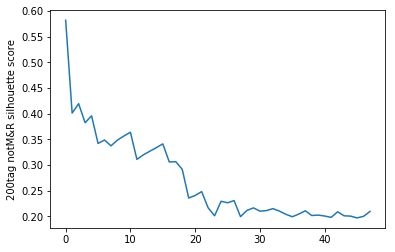

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(SScore_list)
plt.ylabel('200tag notM&R silhouette score')
plt.show()
## n_cluster > 4 조건에서 n_cluster = 14가 0.1394 로 가장 높은 값을 가짐

In [15]:
corr_affinity_threshold['winterfashion'].sort_values(ascending = False)

winterfashion       1.000000
winter              0.470751
winterstyle         0.387951
instashopping       0.387008
buy                 0.386590
winteroutfit        0.384744
todaysoutfit        0.376352
deals               0.374841
egypt               0.374650
whatiweartoday      0.370222
frenzyshopping      0.370171
womenstyle          0.369680
instashop           0.369096
sunglassesaddic     0.365432
shoptillyoudrop     0.361011
snow                0.357681
fashionforgirls     0.355755
stylishgirls        0.353758
girlsdresses        0.353282
girlsfashion        0.349600
womenswear          0.348977
womenfashion        0.342938
sale                0.341952
shopping            0.338753
winterwonderland    0.337926
new                 0.332884
trendy              0.331984
cold                0.325391
wintertime          0.316832
winterishere        0.315780
                      ...   
summerday           0.219198
fashiongram         0.219113
swimsuit            0.218699
fashionshow   

In [16]:
from sklearn.cluster import SpectralClustering

corr_affinity_power = corr_affinity_threshold
pearson_sc = SpectralClustering(n_clusters=40,affinity='precomputed')
predict_sc=pearson_sc.fit_predict(corr_affinity_power)
predict_sc = pd.DataFrame(predict_sc)
predict_sc.columns = ['predict']

In [17]:
node_df = pd.DataFrame(fashion_dict_top, columns=['Tag','Freq'])
node_df['Group'] = predict_sc
node_df.head()

Tag  Freq  Group
0               newin    43      1
1               izmir    43     24
2          beachvibes    43     10
3        1950sfashion    43     17
4  australiandesigner    43     37

In [18]:
group_sort = node_df.sort_values(['Group'],ascending=True)
group_sort

Tag  Freq  Group
914             menswear   466      0
815                 blog   209      0
356           styledaily    67      0
261                 vans    58      0
828                 ootn   224      0
306         mensclothing    62      0
230         happynewyear    56      0
749                gucci   163      0
572              newyear    98      0
859                 2019   278      0
858               trends   277      0
782             fblogger   187      0
771                 mood   179      1
365              weekend    68      1
363           like4likes    68      1
360                texas    67      1
358            wednesday    67      1
355             longhair    67      1
353    wholesaleclothing    66      1
338               friday    65      1
775       blackgirlmagic   181      1
328          newyorkcity    64      1
766                jeans   174      1
349                   la    66      1
778             instapic   183      1
346        koreanfashion    66      1
345              fauxfur    66      1
342               artist    65      1
331               styled    64      1
325               loveit    64      1
..                   ...   ...    ...
616           newarrival   109     37
297        retailtherapy    61     37
350           comingsoon    66     37
790          babyfashion   191     37
366        trendyclothes    68     38
340          outfitstyle    65     38
333          instatravel    64     38
296              culture    61     38
108         sanfrancisco    49     38
272     womenempowerment    59     38
102     fashionstatement    49     38
817       womensclothing   210     38
370           fashionart    68     38
329        indianfashion    64     38
315  fashionphotographer    63     38
990          fashionista  2276     39
991         instafashion  2587     39
992       fashionblogger  3139     39
995          fallfashion  4400     39
938       fashiondiaries   585     39
970        fashionaddict   929     39
969          fashiongram   927     39
967          fashionable   903     39
962          mensfashion   871     39
960         fashionstyle   810     39
931          fashionblog   557     39
927        streetfashion   535     39
890   fashionphotography   370     39
987        womensfashion  1592     39
999              fashion  6847     39

[1000 rows x 3 columns]

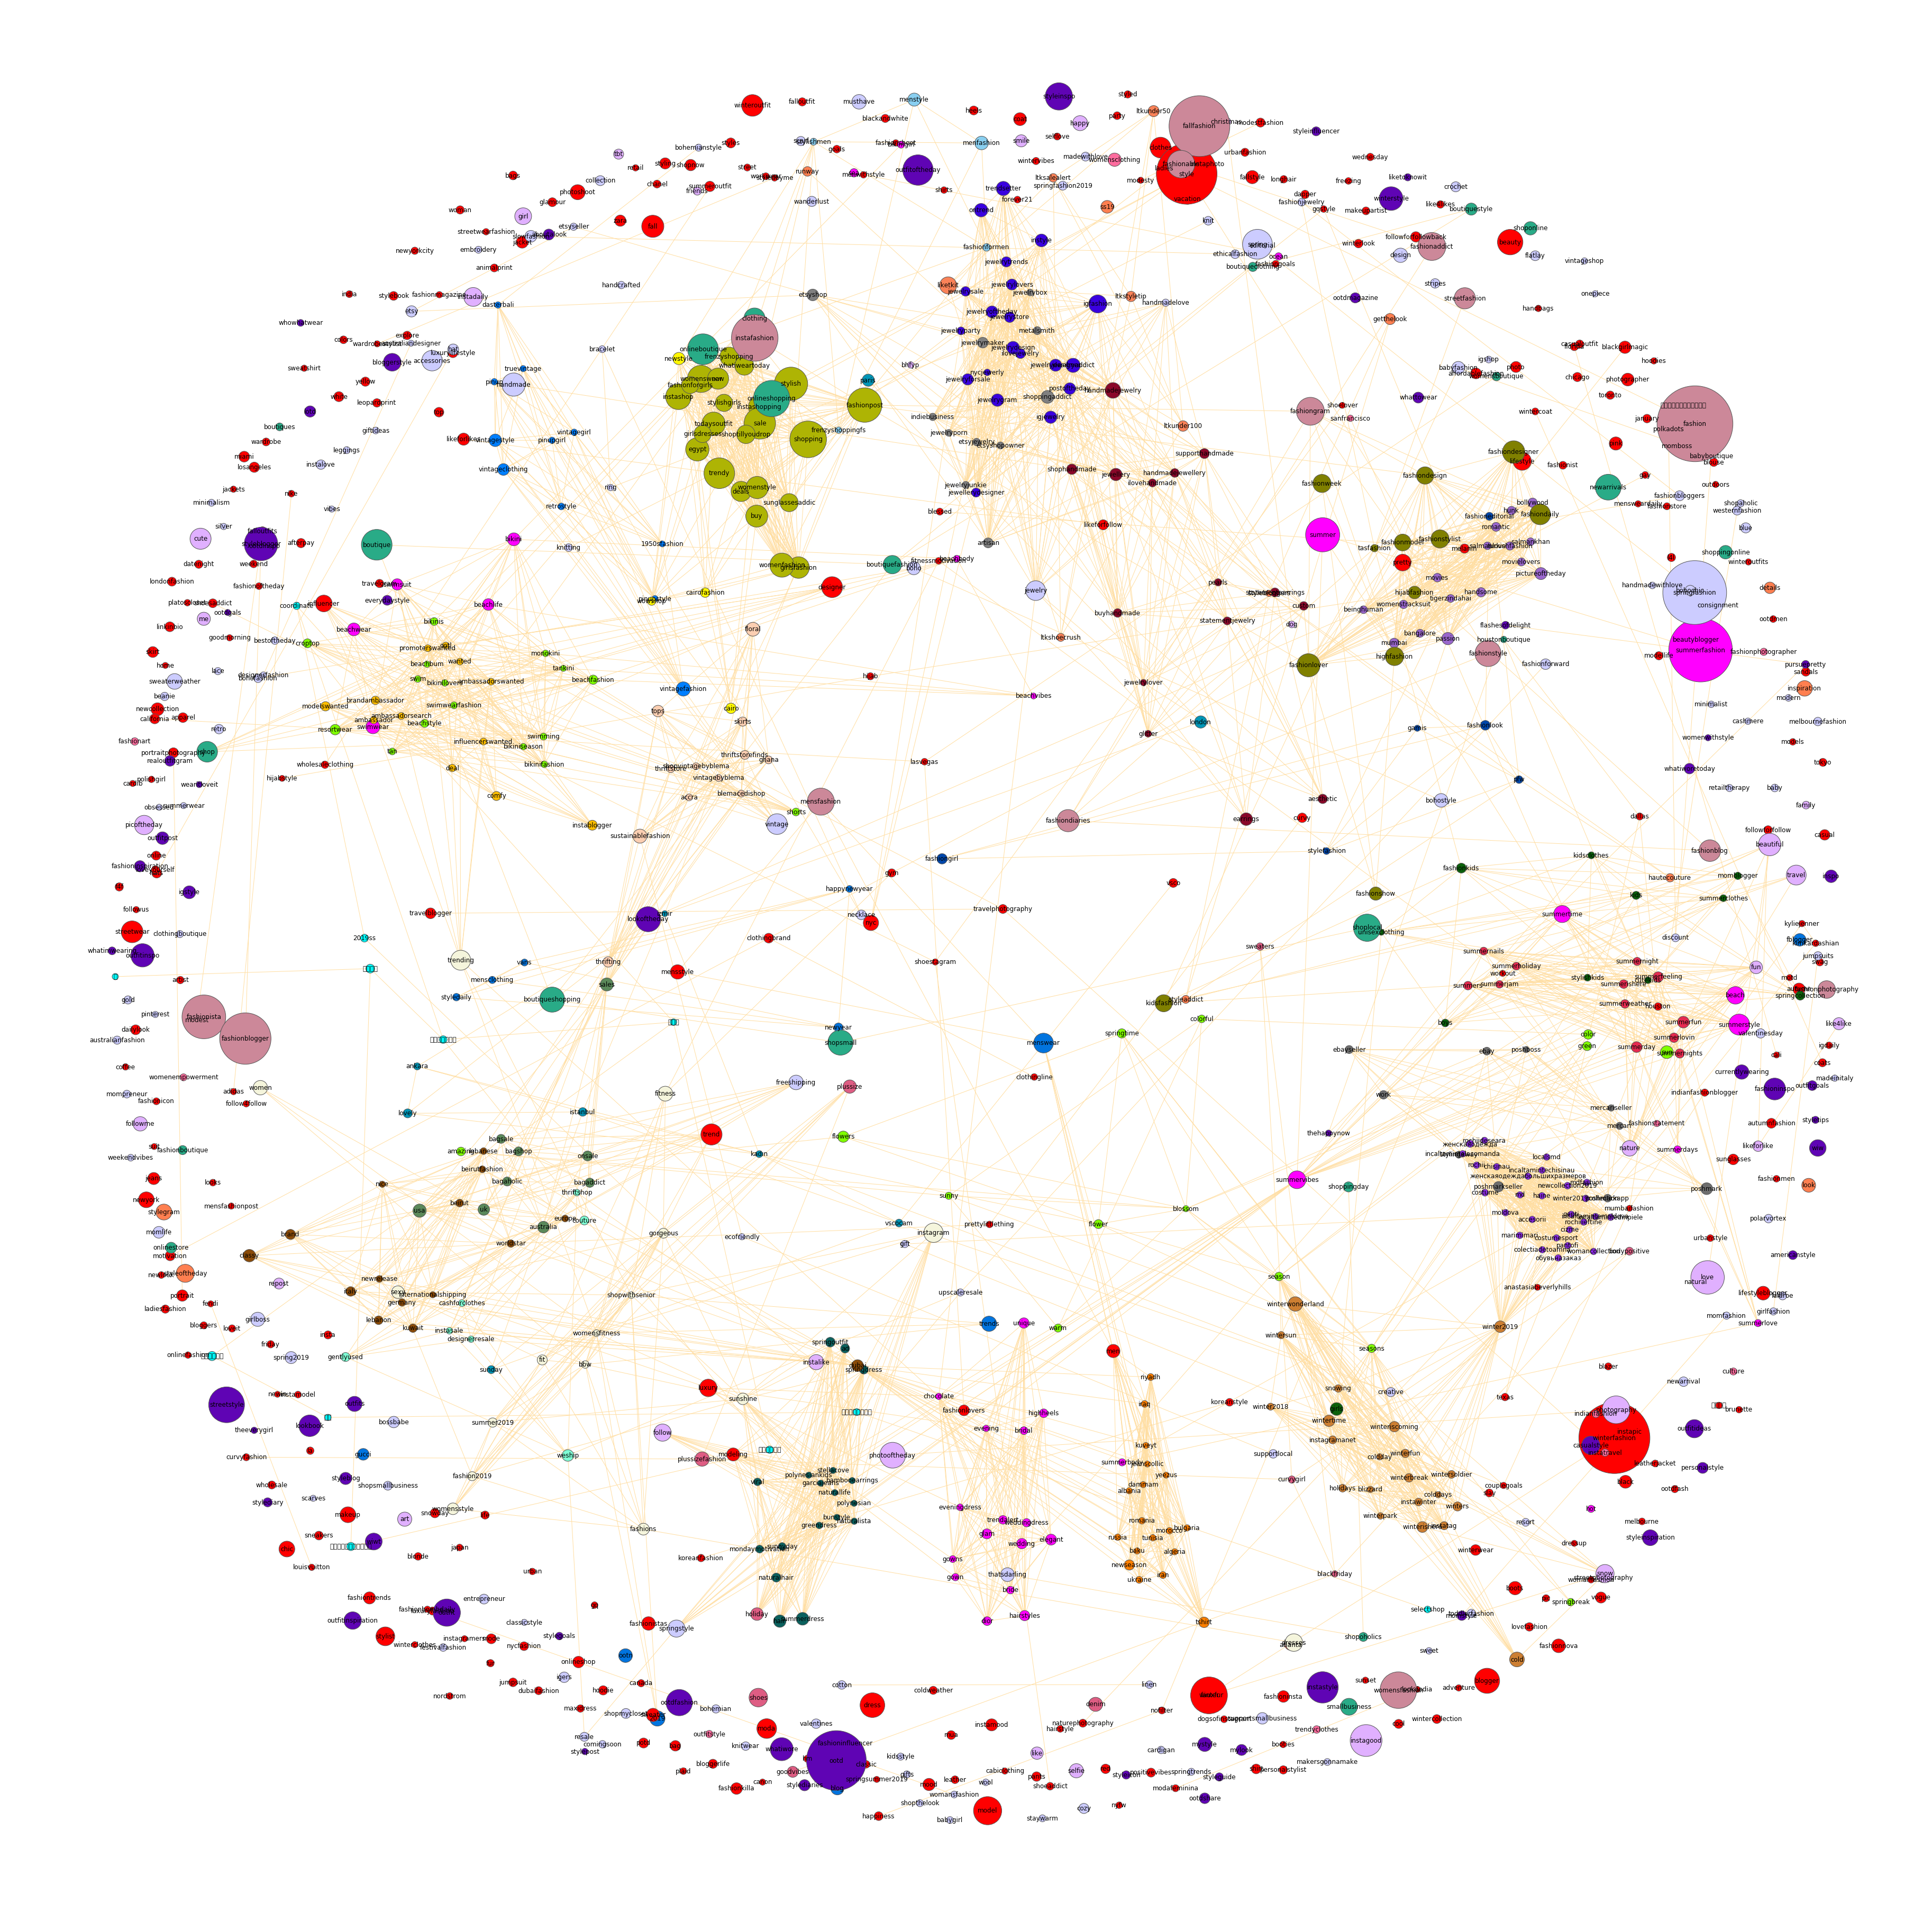

In [23]:
import networkx as nx
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

G = nx.Graph(day = "Stackoverflow")

for index,row in group_sort.iterrows():
    G.add_node(row['Tag'], group = row['Group'], nodesize = row['Freq'])
    
for index1,row1 in group_sort.iterrows():
    for index2,row2 in group_sort.iterrows():
        if row1['Tag'] == row2['Tag']:
            continue
        if corr_affinity[row1['Tag']][row2['Tag']] > 0.3:
            G.add_edge(row1['Tag'],row2['Tag'],weight = corr_affinity[row1['Tag']][row2['Tag']]*10)


# corr_affinity 값이 높은 노드들만 엣지를 연결한다. 1개 ~ 5개 까지 조절 가능
# i = 0
# for index1,row1 in node_df.iterrows():
#     for j in range(5):
#         try:
#             G.add_edge(row1['Tag'],max_values[i][j],weight = corr_affinity[row1['Tag']][max_values[i][j]]*5 )
#         except:
#             pass
# #             print('tag : ' + row1['Tag'] + ' i,j ' + str(i) + ' '+ str(j))
#     i += 1

color_map = {1:'#FF0000', 2:'#FF8000', 3:'#AEB404', 4:'#80FF00', 5:'#0B610B', 6:'#0B615E',  
             7:'#6E6E6E', 0:'#0174DF', 8:'#3A01DF', 9:'#5F04B4', 10:'#FF00FF', 11:'#8A0829',
            12:'#8A4B08',13: '#FA8258' ,14:'#5B895A', 15:'#FBCEB1', 16:'#7FFFD4', 17:'#007FFF', 18:'#89CFF0', 19:'#CD7F32',
             20:'#E52B50', 21:'#FFBF00', 22:'#9966CC', 23:'#F5F5DC', 24:'#0095B6', 25:'#8A2BE2', 26:'#DE5D83', 27:'#7FFF00', 28:'#0047AB',
             29:'#FF7F50', 30:'#00FFFF', 31:'#808080', 32:'#29AB87', 33:'#FFF700', 34:'#FF00FF', 35:'#E0B0FF', 36:'#808000', 37:'#CCCCFF',
            38:'#FD6C9E', 39:'#CC8899', 40:'#D2B48C'}
plt.figure(figsize = (50,50))

options = {
    'edge_color': '#FFDEA2',
    'width': 1,
    'with_labels': True,
    'font_weight': 'regular',
}

colors = [color_map[G.node[node]['group']] for node in G]
sizes = [G.node[node]['nodesize']*3 for node in G]

nx.draw(G, node_color=colors, node_size=sizes,
        pos=nx.spring_layout(G, k=0.5, iterations=50), **options)

ax = plt.gca()
ax.collections[0].set_edgecolor("#555555")
fig = plt.gcf()
plt.show()
fig.savefig('fig2')

In [ ]:
groupby_tags2 = group_sort.groupby('Group')['Tag'].apply(list)
# group_sort.groupby('Group')

In [ ]:
for list in groupby_tags2:
    print(list)
    print()